<a href="https://colab.research.google.com/github/ashlynnsayegh/ashlynnsayegh.github.io/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 9 (final homework 🎉)
### SDS322E



## Enter your name and EID here

**This lab HW will be on Google colab. Make a copy for yourself and work on your own version. You do not need to download your code. Please do not submit your notebook or an HTML file. Click on Share bottom (on the top right), and change the permission to anyone with the link, give edit access, and then share the link on Canvas.**

*For all questions, include the Python commands/functions that you used to find your answer. Answers without supporting code will not receive credit.*


**Congradulations on finishing this course, and thank you for the amazing class. In each homework and lab, my goal was to teach you something new that we did not have time to discuss in class.**

In this last homework, we go over a simiplified version of a project that later lead to a start-up.


### Libraries

Here I import the relevant libraries for your convinience, but feel free to make changes or import additional libraries, as needed.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn

### Question. Flint Water Crisis (20 points)

In this problem we want to tackle a real-world problem, that impacts 40,000 residents of the City of Flint in Michigan. The Flint water crisis is a public health crisis that started in 2014, after the drinking water source for the city of Flint, Michigan was changed. In April 2014, Flint changed its water source from treated Detroit Water and Sewerage Department water to the Flint River. We provide a set of data collected by our team in 2015. Your task is to employ these data and build a predictive model to determine whether or not a home in Flint has a dangerous level of lead contamination in its water.

For this problem set, we have packaged together a large chunk of the publicly-available data from Flint's voluntary residential water testing program. You will be provided with water tests from homes in Flint. Along with the lead test results, you will be provided with other features of the home and lead test, including property value, vacancy status, and time of test. For each sample, we provide you with the result of the lead test, given in parts per billion (PPB). Please see the data field definitions at the end of the problem set. The EPA action level for a dangerous concentration of lead is 15 PPB.


Your task is to build a classifier to predict whether or not the lead test result was at or above 15 PPB for each sample in the test set. We go through all steps together, (1) cleaning data, (2) model building, (3) model evaluation, and (4) interpretation.

#### Data fields

NOTE: If a field is missing from the data file that is provided to you that is fine, we reduced the size of the data file to make it manageable. In this problem, the parcel refers to the individual home.

- Lead_(ppb) - lead concentration in water (parts per billion)
- Latitude - latitude of the parcel
- Longitude - longitude of the parcel
- Land_Value - parcel value
- Land_Improvements_Value - value of improvements on the parcel
- Residential_Building_Value - value of parcel (residential only)
- Commercial_Building_Value - value of parcel (commercial only)
- Building_Storeys - height of parcel in stories
- Parcel_Acres - size of parcel's lot
- Rental - whether or not the parcel is a rental
- Use_Type - parcel usage type
- Prop_Class - type of residential/commercial usage
- Year_Built - year the parcel was built
- Zoning - zoning type of the lot
- Future_Landuse - lot is planned for use in the future
- DRAFT_Zone - future assigned zoning
- Ward - division of the city
- SL_Type - service line type
- SL_Type2 - service line secondary type
- SL_Lead - whether or not the service line contains lead
- Homestead  - Whether or not the parcel is a homestead
- Homestead_Percent - Fraction of homestead
- HomeSEV  - State Equalized Value

### 1 Loading Data

First, load the dataset, `Flint_data.csv`.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/h-aung/Phys206_repo/master/Flint.csv')
# df.dropna(inplace=True)
df.head()

,Land Value,SL_Type2,Year Built,Commercial Building Value,HomeSEV,Homestead Percent,Land Improvements Value,Latitude,Property Zip Code,Longitude,Parcel Acres,Residential Building Value,SL_Type,Lead (ppb)
0,4959,0,1954,0.0,0,100.0,0,32.819562,48506.0,-96.807295,0.142,14299,1,0.0
1,18319,0,1939,0.0,0,100.0,0,41.612146,48503.0,-83.592350,0.121,90597,1,0.0
2,1640,0,1952,0.0,9000,100.0,0,37.072064,48506.0,-94.510948,0.096,57545,5,0.0
3,17877,0,1942,0.0,18000,100.0,0,43.019594,48503.0,-83.659978,0.115,130230,1,7.0
4,25156,0,1953,0.0,21200,100.0,0,43.012109,48503.0,-83.668858,0.143,112447,1,13.0


### 2 Prepare Data -- part 1 (3 points)


Our goal is to perform classification, so we do not try to predict the `Lead (ppb)`, directly. Let's create a new column `label`. `label` is a binary variable `label`: `label`=1 if `Lead (ppb)` >= 15 or y=0 if `Lead (ppb)` < 15.

Why 15 is special? Because this is the level that is regulated by the federal government. Above this threshold is considered as actionable and below this threshold is considered as non-actionable by the federal rules. This does not imply that having lead level of less than 15 ppb is safe, thought.

In [ ]:
# your code

### 3 Prepare Data  -- part 2 (3 points)

First drop column `Lead (ppb)`. Construct the feature and label variables. Then split the data randomly into training and test data sets. **[3 points]**

`label` : label (a binary variable 1 if Lead (ppb) >= 15 0 otherwise)

the rest (except `Lead (ppb)` and `label`) : independent (feature) variables  

In [ ]:
# your code

### 4 Training (4 points)

Use `sklearn` library and train 2 different classifiers of your choice using the training subset.

In [ ]:
# your code

### 5 Model Evaluation -- part 1 (2 points)

Evaluate the performance of your models on the test subset, beyound accuracy, use another performance metric (like percision or recall) and explain what this performance metric is measuring.

In [ ]:
# your code

#### 6 Model Evaluation -- part 2 (2 points)


Make the confusion matrix for both models using the test sample.

In [ ]:
# your code

### 2.5 Feture Importance. (6 points)

We want to use SHAP to evaluate the importance of features.
Given your predictive model, what features are the most important ones in your model? The code is given to you, you just need to interpret the plot.  Describe what each plot is showing and what are the most important features.

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [ ]:
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('https://raw.githubusercontent.com/h-aung/Phys206_repo/master/Flint.csv')

df['label'] = 1
df['label'][df['Lead (ppb)'] < 15] = 0
df.drop('Lead (ppb)', axis=1, inplace=True)

X = df.iloc[:, :-1]; y = df['label']

clf = RandomForestClassifier(n_estimators=500, random_state=23)
clf.fit(X, y)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RandomForestClassifier(n_estimators=500, random_state=23)

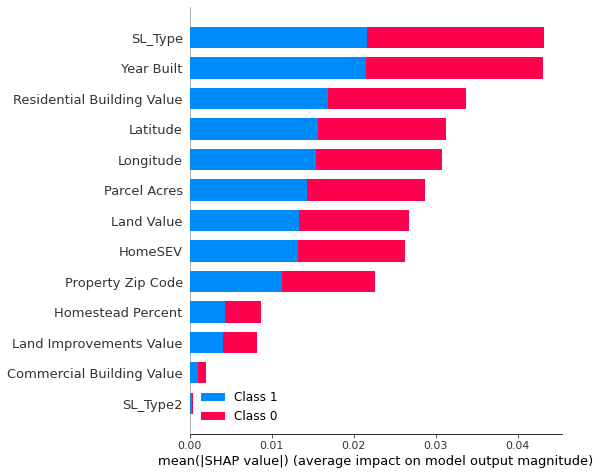

In [ ]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X[::200])
shap.summary_plot(shap_values, X[::200])

True Class (if 1, Lead PPB > 15, othewise Lead PPB < 15 ): 1
Probability that this data point belong to class 0 = 0.31
Base Probability for class 0 = 0.89


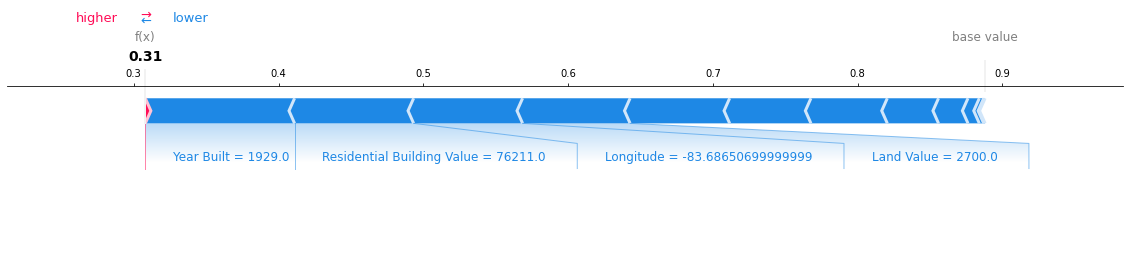

In [ ]:
object_i = 33
class_object_i = int(y[::200].iloc[object_i])
print('True Class (if 1, Lead PPB > 15, othewise Lead PPB < 15 ):', class_object_i)
print('Probability that this data point belong to class 0 = %0.2f'%(explainer.expected_value[0] + sum(shap_values[0][object_i,:])))
print('Base Probability for class 0 = %0.2f'%(explainer.expected_value[0]))

shap.force_plot(explainer.expected_value[0],
                shap_values[0][object_i,:],
                X.iloc[object_i,:],
                matplotlib=True)

#### your answer

**THE END**